# nlopt's SLSQP (2.7.1) on regression tests

Using the potentially constraint-violating SLSQP in nlopt 2.7.1, run Process's regression tests.

This is a place to mess around with nlopt's parameters.

In [1]:
# Reload Process each time (keep editable install up-to-date)
%load_ext autoreload
%autoreload 2

from process.io import plot_solutions as ps

## Single regression run

Run a single regression run using nlopt's SLSQP (2.7.1). Check the values of the constraints.

Use a low `FTOL_REL` to get the constraint residuals lower (due to smaller steps and linearisation of constraints, as in nlopt_low_ftol). Use low `CONSTR_TOL` too.

```
FTOL_REL = 1e-10
CONSTR_TOL = 1e-12
```

In [10]:
results_df = ps.run_and_print("baseline_jan_2017", "nlopt", rerun=False)

Scenario = baseline_jan_2017
Solver = nlopt
Objective function = 1.8922
Constraint residuals = 5.058e-08
Constraints above tolerance: 11
Constraint residuals =
normres001    1.111200e-11
normres002   -2.686400e-11
normres003    7.904800e-14
normres004   -9.759500e-11
normres005   -4.807300e-14
normres006   -4.297600e-08
normres007    2.604300e-10
normres008   -9.541700e-09
normres009    1.233900e-11
normres010    1.804200e-08
normres011    1.717300e-08
normres012   -1.755300e-13
normres013   -2.171600e-13
normres014   -1.859600e-13
normres015   -3.428400e-13
normres016   -3.222800e-12
normres017   -3.486100e-14
normres018   -2.380100e-10
Name: 0, dtype: float64


11 constraints violate the tolerance, hence the solution is infeasible. Lowering the `FTOL_REL` or the `CONSTR_TOL` beyond 1e-8 appears to have no effect on the constraint residuals; they won't go any lower. Constraint residuals = 5.058e-08 is the lowest nlopt's SLSQP will go, apparently.

This seems to incicate that nlopt's SLSQP will return once the linearised constraints are satisfied, and the `FTOL_REL` has been satisfied: it doesn't check the actual (nonlinearised) constraints to check the feasibility of the final solution.

Try again with:

```
FTOL_REL = 1e-6
CONSTR_TOL = 1e-8
```

to maximise chances of reasonable convergence.

In [13]:
results_df = ps.run_and_print("baseline_jan_2017", "nlopt", rerun=False)

Scenario = baseline_jan_2017
Solver = nlopt
Objective function = 1.8922
Constraint residuals = 1.051e-04
Constraints above tolerance: 7
Constraint residuals =
normres001   -1.283400e-09
normres002    3.170200e-09
normres003    5.669900e-12
normres004    1.161300e-08
normres005    2.958100e-10
normres006   -4.897900e-06
normres007   -3.066500e-08
normres008    8.301300e-06
normres009   -1.449900e-09
normres010   -7.588700e-05
normres011   -7.222900e-05
normres012   -1.002200e-11
normres013    8.682000e-10
normres014    8.447400e-10
normres015    2.638800e-09
normres016   -8.424300e-11
normres017    8.391100e-10
normres018    2.804800e-08
Name: 0, dtype: float64


## Subset of regression tests

Run a few regression tests and see how they compare.

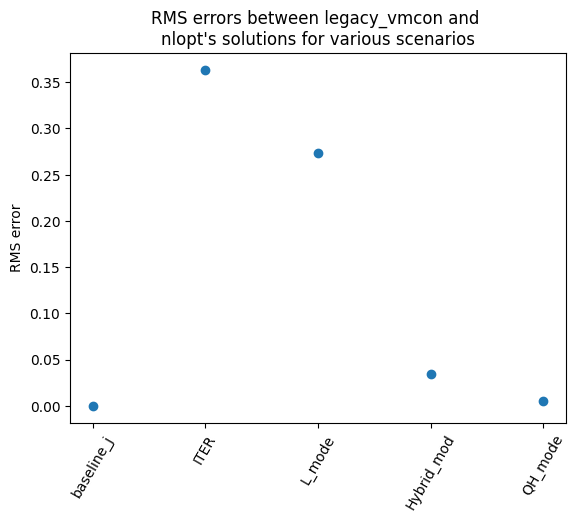

In [17]:
results_df = ps.compare_solvers_regression_tests(["legacy_vmcon", "nlopt"], scenarios=["baseline_jan_2017", "ITER", "L_mode", "Hybrid_mode", "QH_mode"], rerun_tests=False)

In [19]:
results_df[["tag", "sqsumsq"]]

,tag,sqsumsq
0,baseline_jan_2017_legacy_vmcon,2.085200e-10
1,ITER_legacy_vmcon,3.668900e-11
2,L_mode_legacy_vmcon,2.249300e-09
3,Hybrid_mode_legacy_vmcon,6.136600e-09
4,QH_mode_legacy_vmcon,9.473400e-09
5,baseline_jan_2017_nlopt,1.051500e-04
6,ITER_nlopt,2.052600e+00
7,L_mode_nlopt,5.580500e-04
8,Hybrid_mode_nlopt,5.893100e-04
9,QH_mode_nlopt,3.477400e-04


nlopt's SLSQP solves for all 5, but with high constraint residuals. Try dropping the `FTOL_REL` to achieve some more comparable constraints.

```
FTOL_REL = 1e-7
CONSTR_TOL = 1e-9
```

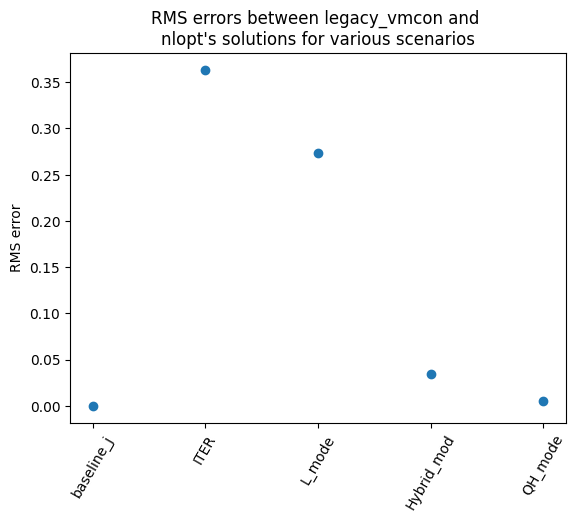

In [21]:
results_df = ps.compare_solvers_regression_tests(["legacy_vmcon", "nlopt"], scenarios=["baseline_jan_2017", "ITER", "L_mode", "Hybrid_mode", "QH_mode"], rerun_tests=False)

In [22]:
results_df[["tag", "sqsumsq"]]

,tag,sqsumsq
0,baseline_jan_2017_legacy_vmcon,2.085200e-10
1,ITER_legacy_vmcon,3.668900e-11
2,L_mode_legacy_vmcon,2.249300e-09
3,Hybrid_mode_legacy_vmcon,6.136600e-09
4,QH_mode_legacy_vmcon,9.473400e-09
5,baseline_jan_2017_nlopt,5.857400e-07
6,ITER_nlopt,2.052600e+00
7,L_mode_nlopt,5.580500e-04
8,Hybrid_mode_nlopt,5.893100e-04
9,QH_mode_nlopt,3.477400e-04


Whilst SLSQP's baseline 2017 solution has much lower residuals, all the other solutions still have very high constraint residuals. This is a problem.

## Trying to get SLSQP's constraint residuals down

Perhaps this is the dreaded divide by zero error again? Interestingly, when Process encounters this error, it still writes a partial MFILE, so no error is thrown. 

SLSQP's ITER is hitting a divide by zero, which needs to be fixed. But on checking, so is VMCON: SLSQP still shouldn't return a solution with such high constraint residuals.

In [8]:
results_df = ps.run_and_print("ITER", "nlopt", rerun=True)

The IN.DAT file does not contain any obsolete variables.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-913-g759a689f1 code contains untracked changes
    Branch : 1813-implement-nlopt-s-slsqp-solver
 Warning in routine OCMMNT :
  Git log : Overwrite regression references for |Merge branch |1829-numba-performance-warnings-in-sctfcoil| into |develop||
This is longer than 110 columns.
   Git log : Overwrite regression references for |Merge branch |1829-numba-performance-warnings-in-sctfcoil| into |develop||
 Da

/home/jon/code/process/process/availability.py:856: RuntimeWarning: invalid value encountered in divide
  po.ocmmnt(self.outfile, "Balance of plant:")
/home/jon/code/process/process/availability.py:960: RuntimeWarning: invalid value encountered in double_scalars
  po.ocmmnt(self.outfile, "Vacuum:")


Evaluation 2, objective function = -5.30000e+00, constraint residuals = 1.250e+05
Evaluation 3, objective function = -5.30000e+00, constraint residuals = 2.176e+00
Evaluation 4, objective function = -5.30000e+00, constraint residuals = 2.176e+00
Evaluation 5, objective function = -5.30000e+00, constraint residuals = 1.234e+05
Evaluation 6, objective function = -5.30000e+00, constraint residuals = 2.053e+00
Evaluation 7, objective function = -5.30000e+00, constraint residuals = 2.053e+00
Constraint residuals = 2.053e+00
 
 ************************************* PROCESS found a feasible solution **************************************
 
    with lower values of EPSVMC to confirm convergence...
    (should be able to get down to about 1.0E-8 okay)
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
134     2   DOOPT: High final VM

/home/jon/code/process/process/costs_2015.py:518: RuntimeWarning: divide by zero encountered in double_scalars
  self.total_costs / self.mean_electric_output / 1.0e6,


Scenario = ITER
Solver = nlopt
Objective function = -5.3
Constraint residuals = 2.053e+00
Constraints above tolerance: 21
Constraint residuals =
normres001   -0.215870
normres002    0.583370
normres003    0.195040
normres004    0.768330
normres005    0.469600
normres006   -0.288670
normres007    1.305600
normres008   -0.000011
normres009   -0.095061
normres010   -0.000007
normres011    0.000191
normres012    0.000033
normres013    0.629600
normres014   -0.000011
normres015   -0.000002
normres016   -0.000126
normres017   -0.000103
normres018   -0.000058
normres019   -0.496830
normres020    0.000010
normres021   -0.733090
Name: 0, dtype: float64


SLSQP returns a solution with all constraints violated.

Try dropping the tols further.

```
FTOL_REL = 1e-8
CONSTR_TOL = 1e-9
```

Still unchanged at 1e-12 for each: high (1e0) constraint residuals. Even with `FTOL_ABS` this is unchanged.

In [2]:
results_df = ps.run_and_print("ITER", "nlopt", rerun=True)

The IN.DAT file does not contain any obsolete variables.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 2.4.0   Release Date :: 2022-05-18
   Tag No. : v2.4.0-913-g759a689f1 code contains untracked changes
    Branch : 1813-implement-nlopt-s-slsqp-solver
 Warning in routine OCMMNT :
  Git log : Overwrite regression references for |Merge branch |1829-numba-performance-warnings-in-sctfcoil| into |develop||
This is longer than 110 columns.
   Git log : Overwrite regression references for |Merge branch |1829-numba-performance-warnings-in-sctfcoil| into |develop||
 Da

/home/jon/code/process/process/availability.py:856: RuntimeWarning: invalid value encountered in divide
  u_unplanned_bop = (bop_mttr * bop_num_failures) / (cv.t_operation)
/home/jon/code/process/process/availability.py:960: RuntimeWarning: invalid value encountered in double_scalars
  u_unplanned_vacuum = max(0.005, t_down / (cv.t_operation + t_down))


Evaluation 2, objective function = -5.30000e+00, constraint residuals = 1.250e+05
Evaluation 3, objective function = -5.30000e+00, constraint residuals = 2.176e+00
Evaluation 4, objective function = -5.30000e+00, constraint residuals = 2.176e+00
Evaluation 5, objective function = -5.30000e+00, constraint residuals = 1.234e+05
Evaluation 6, objective function = -5.30000e+00, constraint residuals = 2.053e+00
Evaluation 7, objective function = -5.30000e+00, constraint residuals = 2.053e+00
Constraint residuals = 2.053e+00
 
 ************************************* PROCESS found a feasible solution **************************************
 
    with lower values of EPSVMC to confirm convergence...
    (should be able to get down to about 1.0E-8 okay)
 
 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
134     2   DOOPT: High final VM

/home/jon/code/process/process/costs_2015.py:518: RuntimeWarning: divide by zero encountered in double_scalars
  self.total_costs / self.mean_electric_output / 1.0e6,


## Conclusion

nlopt's SLSQP provides solutions for the 5 regression tests attempted, but with violated (in some cases, such as ITER, seriously) constraints. Therefore it can't be relied on to provide well-converged solutions.